In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import iris
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from iris.analysis.cartography import cosine_latitude_weights

In [3]:
from aeolus.coord import interp_to_single_pres_lev, roll_cube_pm180, ensure_bounds
from aeolus.const import init_const

In [4]:
# SET DEFAULT FOINT SIZE FOR PLOTTING 
mpl.rcParams['font.size'] = 13
mpl.rcParams["font.family"] = "serif"
csfont = {'fontname':'serif'}
plt.rcParams['mathtext.fontset']='stix'

In [5]:
data_dir = "/Users/jeager/Documents/PhD_work/ekman_ocean/input_data/ProCb/"

In [6]:
base_name = "ProCb_aquaplanet_modern.pb004256_00"

T_surf = "surface_temperature"
sw_net_down = "surface_net_downward_shortwave_flux"
lw_down = "surface_downwelling_longwave_flux_in_air"
latent = "surface_upward_latent_heat_flux"
sensible = "surface_upward_sensible_heat_flux"
# u = "x_wind"
# v = "y_wind"
u = "surface_downward_eastward_stress"
v = "surface_downward_northward_stress"
lw_net_down = "surface_net_downward_longwave_flux"

varnames = [
    T_surf,
    u,
    v,
    sw_net_down,
    lw_net_down,
    lw_down,
    latent,
    sensible,
]

# print(iris.load(data_dir+base_name))

cubes = {}

for varname in varnames:
    filename = data_dir+base_name
    cubes[varname] = iris.load_cube(filename,varname)
    cubes[varname] = roll_cube_pm180(cubes[varname])
    ensure_bounds(cubes[varname])
#     if varname == u or varname == v:
#         cubes[varname] = cubes[varname][0,...]
cubes[v] = cubes[v].interpolate(
        [('latitude', cubes[u].coord('latitude').points)]
        , iris.analysis.Linear()
    )

In [7]:
for varname in varnames:
    lat = cubes[varname].coord('latitude').points
    lon = cubes[varname].coord('longitude').points
    df = pd.DataFrame(cubes[varname].data, index=lat, columns=lon)
#     print(df)
    df.to_csv(varname+".dat", sep='\t', index=None, header=None)


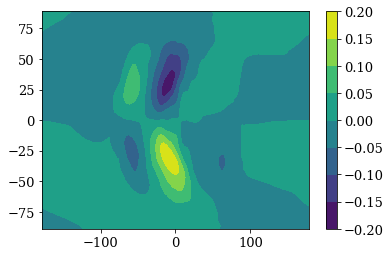

In [8]:
lat = cubes[v].coord('latitude').points
lon = cubes[v].coord('longitude').points
data = cubes[v].data
cntrf = plt.contourf(lon,lat,data)
plt.colorbar(cntrf)
plt.show()